## Cascades Classifier Models for Object Detection

- [opencv example](http://docs.opencv.org/master/d7/d8b/tutorial_py_face_detection.html#gsc.tab=0)
- [boosted cascades repository](http://www.vision-ary.net/2015/03/largest-boosted-cascades-opencv-lbp-haar-hog/)
- [how to train you own cascade model - from mathworks](http://www.mathworks.com/help/vision/ug/train-a-cascade-object-detector.html)
- [another how to train your ~~dragon~~ model](http://www.pyimagesearch.com/2014/11/10/histogram-oriented-gradients-object-detection/)
- [cvdazzle - defence from computer face detection](http://cvdazzle.com/)

In [3]:
%matplotlib inline

In [58]:
from skimage import io, color, transform
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches

In [2]:
## Look at the detector profile shipped with opencv 3
## some of them are downloaded from vision-ary
!tree /home/dola/opt/src/opencv/data/

/home/dola/opt/src/opencv/data/
├── CMakeLists.txt
├── detect_blob.png
├── haarcascades
│   ├── haarcascade_eye_tree_eyeglasses.xml
│   ├── haarcascade_eye.xml
│   ├── haarcascade_frontalcatface_extended.xml
│   ├── haarcascade_frontalcatface.xml
│   ├── haarcascade_frontalface_alt2.xml
│   ├── haarcascade_frontalface_alt_tree.xml
│   ├── haarcascade_frontalface_alt.xml
│   ├── haarcascade_frontalface_default.xml
│   ├── haarcascade_fullbody.xml
│   ├── haarcascade_lefteye_2splits.xml
│   ├── haarcascade_licence_plate_rus_16stages.xml
│   ├── haarcascade_lowerbody.xml
│   ├── haarcascade_profileface.xml
│   ├── haarcascade_righteye_2splits.xml
│   ├── haarcascade_russian_plate_number.xml
│   ├── haarcascade_smile.xml
│   └── haarcascade_upperbody.xml
├── haarcascades_cuda
│   ├── haarcascade_eye_tree_eyeglasses.xml
│   ├── haarcascade_eye.xml
│   ├── haarcascade_frontalface_alt2.xml
│   ├── haarcascade_frontalface_alt_tree.xml
│   ├── haarcascade_frontalface_alt.xml
│   ├── haarcascade

### opencv uses CascadeClassifier as the interface 
### go through some interesting test

In [16]:
from PIL import Image
from skimage import util
profile_path = "/home/dola/opt/src/opencv/data/"
def tocvimg(img):
    return util.img_as_ubyte(img)

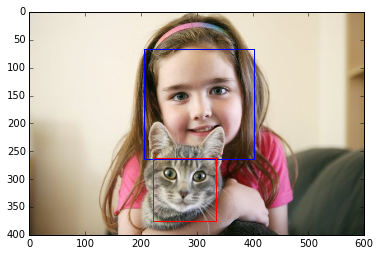

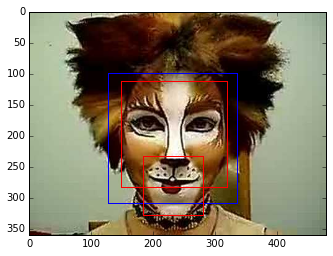

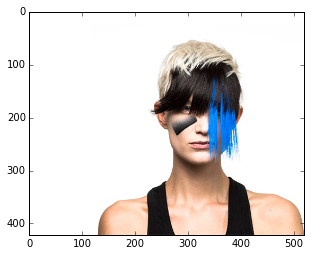

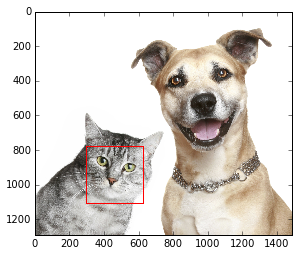

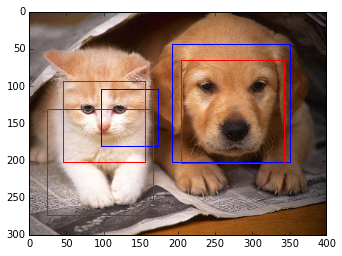

In [60]:
imgs = [io.imread("http://theendinmind.net/wp-content/uploads/2010/05/little-girl-cat.jpg")
, io.imread("http://i.ytimg.com/vi/B8vIwK-e_zI/hqdefault.jpg")
, io.imread("http://cvdazzle.com/assets/img/feature-right.jpg")
, io.imread("http://www.pullman-wa.gov/images/stories/pet_license.jpg")
, transform.rescale(io.imread("http://catflu.net/wp-content/uploads/2015/06/cat5.jpg"), .25)]

for img in imgs:

    cv_img = tocvimg(img)
    #face_detector = cv2.CascadeClassifier(profile_path+"lbpcascades/lbpcascade_frontalface.xml")
    face_detector = cv2.CascadeClassifier(profile_path+"haarcascades_cuda/haarcascade_frontalface_default.xml")

    fig, ax = plt.subplots(1, 1)
    ax.imshow(img)
    ax.autoscale(False)
    #for (x, y, w, h) in face_detector.detectMultiScale(cv_img, scaleFactor=1.3, minNeighbors=4, minSize=(30, 30), flags = cv2.CASCADE_SCALE_IMAGE):
    for (x, y, w, h) in face_detector.detectMultiScale(cv_img):
        ax.add_patch(patches.Rectangle((x, y), w, h, fill=False, color = "blue"))

    cat_detector = cv2.CascadeClassifier(profile_path+"haarcascades/haarcascade_frontalcatface.xml")
    cat_detector = cv2.CascadeClassifier(profile_path+"vision-ary/visionary.net_cat_cascade_web_LBP.xml")
    for (x, y, w, h) in cat_detector.detectMultiScale(cv_img, minSize = (90, 90)):
        ax.add_patch(patches.Rectangle((x, y), w, h, fill=False, color = "red"))